In [31]:
'''


我们将把过去几节中学到的 PyTorch 工作流程应用到计算机视觉中。


0.PyTorch中的计算机视觉库     PyTorch 有很多内置的有用的计算机视觉库，让我们来看看。
1. 加载数据                 为了练习计算机视觉，我们将从FashionMNIST中不同服装的一些图像开始
2. 准备数据                 我们有一些图像，让我们使用PyTorch DataLoader加载它们，以便我们可以在训练循环中使用它们。
3. 模型0: 构建基线模型       在这里，我们将创建一个多类分类模型来学习数据中的模式，我们还将选择损失函数、优化器并构建训练循环。
4. 进行预测和评估模型 0       让我们用基线模型进行一些预测并对其进行评估。
5. 为未来模型设置设备无关代码  最佳实践是编写与设备无关的代码，所以让我们来设置它。
6. 模型 1: 添加非线性        实验是机器学习的重要组成部分，让我们尝试通过添加非线性层来改进我们的基线模型。
7. 模型2: 卷积神经网络(CNN)  是时候具体了解计算机视觉并介绍强大的卷积神经网络架构了。
8. 比较我们的模型            我们构建了三种不同的模型，让我们对它们进行比较。
9. 评估我们的最佳模型        让我们对随机图像进行一些预测并评估我们的最佳模型。
10.制作混淆矩阵             混淆矩阵是评估分类模型的好方法，让我们看看如何制作一个。
11.保存和加载性能最佳的模型   由于我们可能想稍后使用我们的模型，因此我们保存它并确保它正确加载。

'''

'\n\n\n我们将把过去几节中学到的 PyTorch 工作流程应用到计算机视觉中。\n\n\n0.PyTorch中的计算机视觉库     PyTorch 有很多内置的有用的计算机视觉库，让我们来看看。\n1. 加载数据                 为了练习计算机视觉，我们将从FashionMNIST中不同服装的一些图像开始\n2. 准备数据                 我们有一些图像，让我们使用PyTorch DataLoader加载它们，以便我们可以在训练循环中使用它们。\n3. 模型0: 构建基线模型       在这里，我们将创建一个多类分类模型来学习数据中的模式，我们还将选择损失函数、优化器并构建训练循环。\n4. 进行预测和评估模型 0       让我们用基线模型进行一些预测并对其进行评估。\n5. 为未来模型设置设备无关代码  最佳实践是编写与设备无关的代码，所以让我们来设置它。\n6. 模型 1: 添加非线性        实验是机器学习的重要组成部分，让我们尝试通过添加非线性层来改进我们的基线模型。\n7. 模型2: 卷积神经网络(CNN)  是时候具体了解计算机视觉并介绍强大的卷积神经网络架构了。\n8. 比较我们的模型            我们构建了三种不同的模型，让我们对它们进行比较。\n9. 评估我们的最佳模型        让我们对随机图像进行一些预测并评估我们的最佳模型。\n10.制作混淆矩阵             混淆矩阵是评估分类模型的好方法，让我们看看如何制作一个。\n11.保存和加载性能最佳的模型   由于我们可能想稍后使用我们的模型，因此我们保存它并确保它正确加载。\n\n'

In [32]:
'''
0.PyTorch中的计算机视觉库

torchvision               包含常用于计算机视觉问题的数据集、模型架构和图像转换。
torchvision.datasets     在这里，您将找到许多示例计算机视觉数据集，用于解决图像分类、对象检测、图像字幕、视频分类等一系列问题。它还包含一系列用于制作自定义数据集的基类。
torchvision.models       该模块包含在 PyTorch 中实现的性能良好且常用的计算机视觉模型架构，您可以将它们用于解决您自己的问题。
torchvision.transforms   在与模型一起使用之前，图像通常需要进行转换（转换为数字/处理/增强），常见的图像转换可以在此处找到。
torch.utils.data.Dataset  PyTorch 的基础数据集类。
torch.utils.data.DataLoader     在数据集上创建 Python 可迭代对象（使用torch.utils.data.Dataset创建）。


注意： torch.utils.data.Dataset 和 torch.utils.data.DataLoader
类不仅适用于 PyTorch 中的计算机视觉，它们还能够处理许多不同类型的数据。


现在我们已经介绍了一些最重要的 PyTorch 计算机视觉库，让我们导入相关的依赖项。

'''

# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")



PyTorch version: 2.4.0+cu121
torchvision version: 0.19.0+cu121


In [33]:
'''
1. 获取数据集

我们将从 FashionMNIST 开始。
MNIST stands for Modified National Institute of Standards and Technology.
MNIST 代表修改后的国家标准与技术研究院。
原始 MNIST 数据集包含数千个手写数字示例（从 0 到 9），用于构建计算机视觉模型来识别邮政服务号码。
由 Zalando Research 开发的FashionMNIST也是类似的设置。
但它包含 10 种不同服装的灰度图像。

torchvision.datasets包含许多示例数据集，您可以使用它们来练习编写计算机视觉代码。 
FashionMNIST 就是其中之一。由于它有 10 个不同的图像类别（不同类型的服装），因此这是一个多类别分类问题。

PyTorch 在torchvision.datasets中存储了一堆常见的计算机视觉数据集。
将 FashionMNIST 纳入其中。

要下载它，我们提供以下参数：
root: str           - 您要将数据下载到哪个文件夹？
train: Bool         - 你想要训练还是测试分开？
download: Bool      - 是否应该下载数据？
transform: torchvision.transforms - 您想对数据进行什么转换？
target_transform    - 如果您也愿意，您可以转换目标（标签）。

'''

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

# train_data.shape

In [34]:

# See first training sample
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [35]:

# What's the shape of the image?
# [color_channels=1, height=28, width=28]

image.shape


torch.Size([1, 28, 28])

In [36]:
'''
我们当前张量的顺序通常称为CHW （颜色通道、高度、宽度）。

关于图像应该表示为CHW （颜色通道在前）还是HWC （颜色通道在后）存在争议。

PyTorch 通常接受NCHW （通道优先）作为许多算子的默认设置。

然而，PyTorch 还解释说NHWC （通道最后）性能更好，被认为是最佳实践。


目前，由于我们的数据集和模型相对较小，因此这不会产生太大的差异。

让我们检查一下数据的更多形状。


'''

# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [37]:

'''
所以我们有 60,000 个训练样本和 10,000 个测试样本。
我们可以通过.classes属性找到它们。


'''

# See classes
class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


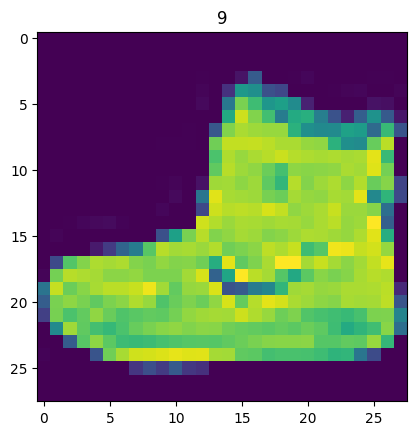

In [38]:
'''
看起来我们正在处理 10 种不同的衣服。
因为我们正在处理 10 个不同的类，所以这意味着我们的问题是多类分类。


'''


import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

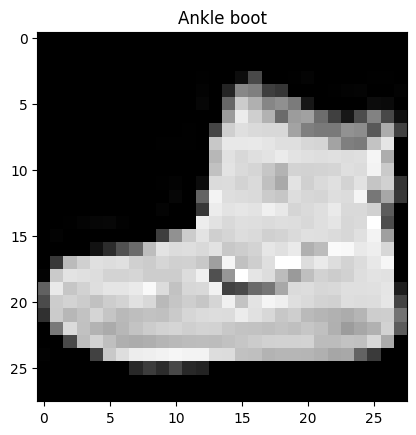

In [39]:
# 我们可以使用plt.imshow()的cmap参数将图像转换为灰度。

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

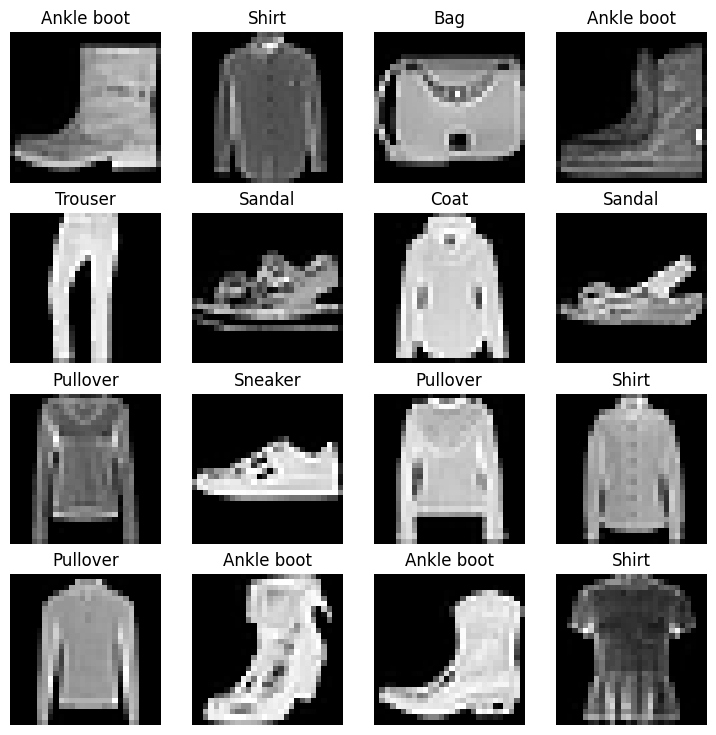

In [40]:

# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [41]:
'''


但我们将要学习的如何为其构建模型的原则在广泛的计算机视觉问题中都是相似的。

本质上，获取像素值并构建模型以查找其中的模式以用于未来的像素值。

另外，即使对于这个小数据集（是的，即使深度学习中的 60,000 张图像也被认为是相当小的），
你能编写一个程序来对每个图像进行分类吗？

你也许可以。


但我认为在 PyTorch 中编写模型会更快。



2. 准备DataLoader


下一步是使用 torch.utils.data.DataLoader 或简称 DataLoader 来准备它。

DataLoader 会执行您认为它可能执行的操作。

它将大型Dataset转换为较小块的 Python 迭代。

这些较小的块称为批次或迷你批次，可以通过batch_size参数设置。

为什么要这样做？ 因为它的计算效率更高。


在理想的情况下，您可以同时对所有数据进行前向传递和反向传递。

但是一旦你开始使用非常大的数据集，除非你有无限的计算能力，否则将它们分成批次会更容易。

对于小批量（数据的一小部分），每个时期执行梯度下降的频率更高（每个小批量一次而不是每个epoch 一次）。

什么是好的批量大小？
32 是解决相当多问题的好起点。

但由于这是一个可以设置的值（超参数），因此您可以尝试所有不同类型的值，
尽管通常最常使用 2 的幂（例如 32、64、128、256、512）。


让我们为我们的训练和测试集创建DataLoader 。

'''

from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f25dcb775b0>, <torch.utils.data.dataloader.DataLoader object at 0x7f25d658e3b0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image shape is torch.Size([1, 28, 28])
Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


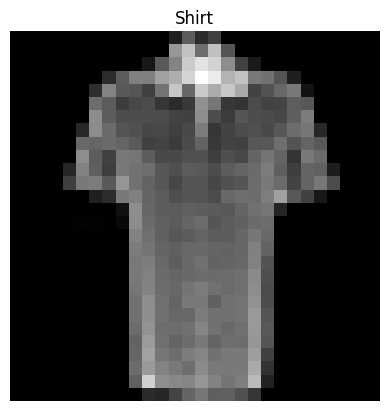

In [42]:

# 我们通过检查单个样本可以看到数据保持不变。

# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

print(f"image shape is {img.shape}")

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [47]:
'''
3.模型0：构建基线模型

数据已加载并准备就绪！
是时候通过子类化nn.Module来构建基线模型了。

基线模型是您能想象到的最简单的模型之一。
您使用基线作为起点，并尝试使用后续更复杂的模型对其进行改进。
我们的基线将由两个nn.Linear()层组成。

我们在上一节中已经做到了这一点，但会有一点细微的差别。

因为我们正在处理图像数据，所以我们将使用不同的层来开始工作。

这就是nn.Flatten()层。

nn.Flatten()将张量的维度压缩为单个向量。

'''

# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
# print(x)
# print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [48]:

'''

nn.Flatten()层采用了我们的形状 [color_channels, height, width] 到 [color_channels, height*width] 。
为什么要这样做？

因为我们现在已经将像素数据从高度和宽度维度转换为一个长特征向量。
nn.Linear()层喜欢其输入采用特征向量的形式。

让我们使用nn.Flatten()作为第一层来创建第一个模型。


'''
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)
    

'''

我们已经有了一个可以使用的基线模型类，现在让我们实例化一个模型。

我们需要设置以下参数：


input_shape=784 - 这是模型中的特征数量，在我们的例子中，
目标图像中的每个像素都有一个特征（28 像素高 x 28 像素宽 = 784 个特征）。

hidden_units=10 - 隐藏层中的单元/神经元数量，这个数字可以是您想要的任何数字，但为了保持模型较小，我们将从10开始。

output_shape=len(class_names) - 由于我们正在处理多类分类问题，因此数据集中的每个类都需要一个输出神经元。

让我们创建一个模型实例并暂时发送到 CPU（我们将运行一个小测试，在 CPU 上运行model_0 ，然后在 GPU 上运行类似的模型）。



'''


torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 



FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [49]:
'''
3.1 设置损失、优化器和评估指标

由于我们正在研究分类问题，因此让我们引入helper_functions.py脚本，然后引入我们在笔记本 02中定义的accuracy_fn() 。

注意：您可以从TorchMetrics 包导入各种评估指标，而不是导入和使用我们自己的准确性函数或评估指标。



'''

# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

'''
3.2 创建一个函数来计时我们的实验

是时候开始训练模型了。
但是我们在训练时做一个小实验怎么样？
我的意思是，让我们创建一个计时函数来测量我们的模型在 CPU 上训练与使用 GPU 训练所需的时间。

我们将在 CPU 上训练这个模型，在 GPU 上训练下一个模型，看看会发生什么。

我们的计时函数将从 Python timeit模块导入timeit.default_timer()函数。

'''


from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

'''
3.3 创建训练循环并在批量数据上训练模型

看起来我们已经准备好了拼图的所有部分，一个计时器，一个损失函数，一个优化器，一个模型，最重要的是，一些数据。

现在让我们创建一个训练循环和一个测试循环来训练和评估我们的模型。

我们将使用与之前的笔记本相同的步骤，但由于我们的数据现在采用批处理形式，因此我们将添加另一个循环来循环处理我们的数据批次。

我们的数据批次包含在DataLoader中, train_dataloader 和 test_dataloader 分别用于训练和测试数据分割。

一个批次是X （特征）和y （标签）的BATCH_SIZE样本，因为我们使用 BATCH_SIZE=32 ，所以我们的批次有 32 个图像和目标样本。

由于我们正在计算批量数据，因此我们的损失和评估指标将按批次计算，而不是在整个数据集上计算。

这意味着我们必须将损失和准确度值除以每个数据集各自的数据加载器中的批次数。

1. 循环历元。
2. 循环训练批次，执行训练步骤，计算每批次的训练损失。
3. 循环测试批次，执行测试步骤，计算每批次的测试损失。
4. 打印出发生了什么。
5. 计时（为了好玩）。


'''


# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))




/home/intel/suhao/deep-learning-from-scratch/env_dlfs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:08<00:16,  8.29s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:16<00:08,  8.42s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:25<00:00,  8.35s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 25.055 seconds


In [51]:
'''

好的！看起来我们的基线模型表现得相当不错。
训练的时间也不是太长，即使只是在CPU上训练，不知道在GPU上会不会加速？

让我们编写一些代码来评估我们的模型。

4. 进行预测并获得 Model 0 结果


由于我们将构建一些模型，因此最好编写一些代码以类似的方式评估所有模型。

也就是说，让我们创建一个接受训练模型、 DataLoader 、损失函数和准确度函数的函数。
该函数将使用模型对DataLoader中的数据进行预测，然后我们可以使用损失函数和准确度函数评估这些预测。

'''

torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model       = model_0, 
                             data_loader = test_dataloader,
                             loss_fn     = loss_fn, 
                             accuracy_fn = accuracy_fn
)
model_0_results




{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [52]:
'''
稍后我们可以使用这个字典将基线模型结果与其他模型进行比较。

5. 设置设备无关代码（用于使用 GPU，如果有的话

我们已经了解了在 CPU 上使用 60,000 个样本训练 PyTorch 模型需要多长时间。
现在，让我们为我们的模型和数据设置一些与设备无关的代码，以便在 GPU 可用时在 GPU 上运行。

如果您在 Google Colab 上运行此笔记本，并且尚未打开 GPU，那么现在是时候通过以下方式打开 GPU： Runtime -> Change runtime type -> Hardware accelerator -> GPU 。如果这样做，您的运行时可能会重置，并且您必须通过运行Runtime -> Run before来运行上面的所有单元格。


'''

# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device




'cuda'

In [53]:
'''
6. 模型 1：建立更好的非线性模型


我们在笔记本 02 中了解了非线性的威力。

看到我们一直在处理的数据，您认为它需要非线性函数吗？


请记住，线性意味着直线，非线性意味着非直线。
让我们来看看吧。
我们将通过重新创建与之前类似的模型来实现此目的，但这次我们将在每个线性层之间放置非线性函数 ( nn.ReLU() )。

'''

# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
    
'''
现在让我们使用之前使用的相同设置来实例化它。

我们需要input_shape=784 （等于图像数据的特征数量）， 
hidden_units=10 （从小处开始，与我们的基线模型相同）和output_shape=len(class_names) （每个类一个输出单元）。



'''

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
print(model_1.parameters())
next(model_1.parameters()).device # check model device



<generator object Module.parameters at 0x7f25dcc1a500>


device(type='cuda', index=0)

In [54]:

'''

6.1 设置损失、优化器和评估指标

像往常一样，我们将设置一个损失函数、一个优化器和一个评估指标（我们可以执行多个评估指标，但现在我们将坚持准确性）。


'''

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)


'''
6.2 训练和测试循环功能化

到目前为止，我们已经一遍又一遍地编写训练和测试循环。

让我们再次编写它们，但这次我们将它们放在函数中，以便可以一次又一次地调用它们。

因为我们现在使用与设备无关的代码，所以我们一定会在我们的特征（ X ）和目标（ y ）张量上调用.to(device) 。

对于训练循环，我们将创建一个名为train_step()的函数，该函数接受模型、 DataLoader损失函数和优化器。

测试循环将是类似的，但它将被称为test_step()并且它将接受一个模型、一个DataLoader 、一个损失函数和一个评估函数。

注意：由于这些是函数，您可以按照您喜欢的任何方式自定义它们。我们在这里所做的可以被认为是针对我们特定分类用例的准系统训练和测试功能。

'''

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


'''
现在我们已经有了一些用于训练和测试模型的函数，让我们运行它们。

注意：您可以自定义执行测试步骤的频率。有时人们每 5 个 epoch 或 10 个 epoch 执行一次，或者在我们的例子中，每个 epoch 执行一次。

'''

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:07<00:15,  7.66s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:14<00:07,  7.40s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:22<00:00,  7.37s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 22.105 seconds


In [55]:
'''

问题： “我使用了 GPU，但我的模型训练速度并没有更快，这是为什么呢？”

答案：嗯，原因之一可能是因为您的数据集和模型都非常小（就像我们正在使用的数据集和模型），使用 GPU 的好处被实际传输数据所需的时间所抵消。

让我们使用eval_model()函数评估经过训练的model_1并看看效果如何。

'''

torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [56]:
'''

这是因为我们已经将数据和模型设置为使用与设备无关的代码，而不是我们的评估函数。


我们如何通过将目标device参数传递给eval_model()函数来解决这个问题？
然后我们将尝试再次计算结果。

'''
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [57]:
'''
哇哦，在这种情况下，看起来向我们的模型添加非线性使其性能比基线更差。

这是机器学习中需要注意的一点，有时你认为应该起作用的东西却不起作用。

然后你认为可能行不通的事情就行了。

它一半是科学，一半是艺术。

从表面上看，我们的模型似乎对训练数据过度拟合。

过度拟合意味着我们的模型很好地学习了训练数据，但这些模式无法推广到测试数据。


修复过度拟合的两个主要方法包括：

1. 使用更小的或不同的模型（某些模型比其他模型更适合某些类型的数据）。
2. 使用更大的数据集（数据越多，模型学习可概括模式的机会就越大）。

与此同时，让我们看一下第一点：使用不同的模型。


7.模型2：构建卷积神经网络（CNN）

是时候创建一个卷积神经网络（CNN 或 ConvNet）了。
CNN 以其在视觉数据中查找模式的能力而闻名。

由于我们正在处理视觉数据，让我们看看使用 CNN 模型是否可以改进我们的基线。

我们要使用的 CNN 模型在CNN Expander网站上被称为 TinyVGG。
它遵循卷积神经网络的典型结构：

内容 [Convolutional layer -> activation layer -> pooling layer] 可以根据要求进行升级和重复多次。

我们应该使用什么模型？

结构化数据（Excel 电子表格、行和列数据） 梯度提升模型、随机森林、XGBoost     sklearn.ensemble, XGBoost library
非结构化数据（图像、音频、语言）         卷积神经网络、Transformers        torchvision.models, HuggingFace Transformers



模型的讨论已经够多了，现在让我们构建一个 CNN，复制CNN Expander 网站上的模型。

为此，我们将利用torch.nn中的nn.Conv2d()和nn.MaxPool2d()层。

''' 

# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2



FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [58]:
'''
Nice! 好的！

我们迄今为止最大的模型！


我们所做的是机器学习中的常见做法。

Find a model architecture somewhere and replicate it with code.
在某处找到模型架构并用代码复制它。

7.1 单步执行nn.Conv2d()

我们可以开始使用上面的模型，看看会发生什么，但让我们首先了解我们添加的两个新层：


nn.Conv2d() ，也称为卷积层。

nn.MaxPool2d() ，也称为最大池化层。

问题： nn.Conv2d()中的“2d”代表什么？

2d 用于二维数据。例如，我们的图像有两个维度：高度和宽度。是的，有颜色通道尺寸，但每个颜色通道尺寸也有两个尺寸：高度和宽度。

对于其他维度数据（例如文本的 1D 或 3D 对象的 3D), 还有nn.Conv1d()和nn.Conv3d() 。

为了测试各层，让我们创建一些玩具数据，就像 CNNExplainer 上使用的数据一样。
'''

torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")



Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
'''
让我们创建一个具有各种参数的示例nn.Conv2d() ：


in_channels (int)           - 输入图像中的通道数。
out_channels (int)          - 卷积产生的通道数。
kernel_size (int 或 tuple)  - 卷积内核/过滤器的大小。
stride (int 或 tuple, 可选)  - 卷积核一次采取多大的步长。默认值：1。
padding (int, tuple, str)   - 添加到输入的所有四个边的填充。默认值：0。

'''




![这是图片](./imgs/03-conv2d-layer.gif "dims")

In [62]:
torch.manual_seed(42)

print(test_image.shape)
# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
output = conv_layer(test_image) 

print(output.shape)
# Note: If running PyTorch <1.11.0, this will error because of shape 
# issues (nn.Conv.2d() expects a 4d tensor as input) 

torch.Size([3, 64, 64])
torch.Size([10, 62, 62])


In [64]:
'''
嗯，注意我们的形状发生了什么（与CNN 解释器上 TinyVGG 第一层的形状相同），我们得到不同的通道大小以及不同的像素大小。

如果我们改变conv_layer的值会怎样？

'''

torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image).shape



torch.Size([10, 30, 30])

In [65]:
'''


哇哦，我们又得到了另一个形状变化。


现在我们的图像的形状为[ 10, 30, 30] （如果使用不同的值，它会有所不同）或 [batch_size=1, color_channels=10, height=30, width=30] 。

这是怎么回事？

在幕后，我们的nn.Conv2d()正在压缩存储在图像中的信息。

它通过根据其内部参数对输入（我们的测试图像）执行操作来实现这一点。

其目标与我们一直在构建的所有其他神经网络类似。

数据进入后，在优化器的帮助下，各层尝试更新其内部参数（模式）以降低损失函数。

唯一的区别是不同层如何计算其参数更新，或者用 PyTorch 术语来说，即层的forward()方法中存在的操作。

如果我们检查conv_layer_2.state_dict()我们会发现与之前看到的类似的权重和偏差设置。

'''
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [66]:
'''

Look at that! A bunch of random numbers for a weight and bias tensor.
看看那个！权重和偏差张量的一堆随机数。

The shapes of these are manipulated by the inputs we passed to nn.Conv2d() when we set it up.
它们的形状由我们在设置时传递给nn.Conv2d()的输入来操纵。

Let's check them out. 让我们来看看它们。

'''
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")


conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [67]:
'''
问题：我们应该如何设置nn.Conv2d()层的参数？

这是一件好事。但与机器学习中的许多其他事物类似，这些值并不是一成不变的（回想一下，因为这些值是我们可以自己设置的值，所以它们被称为“超参数”）。

找出答案的最佳方法是尝试不同的值，看看它们如何影响模型的性能。

或者更好的是，找到一个与您的问题类似的工作示例（就像我们对 TinyVGG 所做的那样）并复制它。

我们正在使用与我们之前看到的不同的层。


但前提仍然是一样的：从随机数开始并更新它们以更好地表示数据。

7.2 单步执行nn.MaxPool2d()

现在让我们看看当我们通过nn.MaxPool2d()移动数据时会发生什么。


'''
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [68]:
'''
请注意nn.MaxPool2d()层内外发生的形状变化。

nn.MaxPool2d()层的kernel_size将影响输出形状的大小。

在我们的例子中，形状从62x62图像减半为31x31图像。

让我们用更小的张量来看看这个工作。

'''
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [69]:
'''
7.3 为model_2设置损失函数和优化器

我们已经足够了解第一个 CNN 中的各个层了。


但请记住，如果仍有不清楚的地方，请尝试从小处开始。


选择模型的单个层，通过它传递一些数据，看看会发生什么。


现在是时候继续前进并开始训练了！


让我们设置一个损失函数和一个优化器。


我们将像以前一样使用函数nn.CrossEntropyLoss()作为损失函数（因为我们正在处理多类分类数据）。


torch.optim.SGD()作为优化器来优化model_2.parameters()学习率为0.1 。

'''
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)


'''


7.4 使用我们的训练和测试函数训练和测试model_2

损失和优化器准备好了！

是时候进行训练和测试了。

我们将使用之前创建的train_step()和test_step()函数。

我们还将测量时间，将其与我们的其他模型进行比较。
'''

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59884 | Train accuracy: 78.28%


 33%|███▎      | 1/3 [00:08<00:17,  8.96s/it]

Test loss: 0.39613 | Test accuracy: 85.86%

Epoch: 1
---------
Train loss: 0.36363 | Train accuracy: 86.92%


 67%|██████▋   | 2/3 [00:17<00:08,  8.84s/it]

Test loss: 0.34585 | Test accuracy: 87.10%

Epoch: 2
---------
Train loss: 0.32437 | Train accuracy: 88.21%


100%|██████████| 3/3 [00:26<00:00,  8.81s/it]

Test loss: 0.32221 | Test accuracy: 88.28%

Train time on cuda: 26.417 seconds


In [70]:
'''
哇哦！看起来卷积层和最大池化层有助于提高性能。

Let's evaluate model_2's results with our eval_model() function.
让我们使用eval_model()函数评估model_2的结果。

'''
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3222130537033081,
 'model_acc': 88.27875399361022}

In [71]:
'''
8. 比较模型结果和训练时间

我们训练了三种不同的模型。

1. model_0 - 我们的基线模型有两个nn.Linear()层。
2. model_1 - 与我们的基线模型相同的设置, 除了nn.Linear()层之间有nn.ReLU()层。
3. model_2 - 我们的第一个 CNN 模型，模仿 CNN 解释器网站上的 TinyVGG 架构。


这是机器学习中的常规做法。

Building multiple models and performing multiple training experiments to see which performs best.
构建多个模型并执行多个训练实验，看看哪个模型表现最好。

Let's combine our model results dictionaries into a DataFrame and find out.
让我们将模型结果字典合并到 DataFrame 中并找出答案。


'''

import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results



,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.322213,88.278754


In [72]:
'''
我们也可以添加训练时间值。

'''

# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,25.054573
1,FashionMNISTModelV1,0.685001,75.019968,22.104964
2,FashionMNISTModelV2,0.322213,88.278754,26.416849


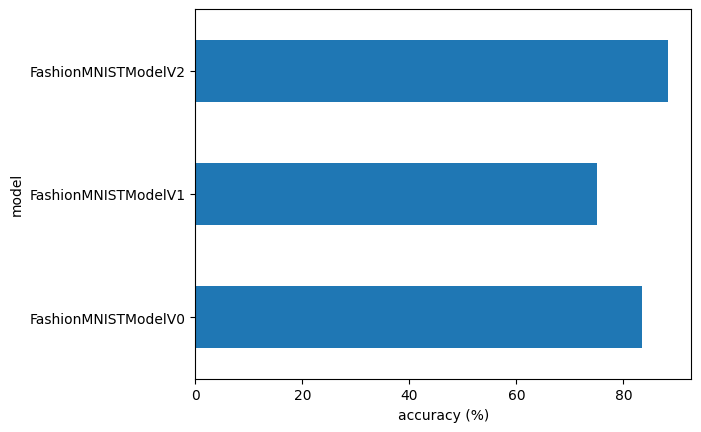

In [77]:
'''

看起来我们的 CNN ( FashionMNISTModelV2 ) 模型表现最好（损失最低，准确率最高），但训练时间最长。

我们的基线模型 ( FashionMNISTModelV0 ) 的表现优于model_1 ( FashionMNISTModelV1 )。

性能与速度的权衡

在机器学习中需要注意的是性能与速度的权衡。
一般来说，您可以从更大、更复杂的模型中获得更好的性能（就像我们对model_2所做的那样）。

然而，这种性能提升通常是以牺牲训练速度和推理速度为代价的。

注意：您获得的训练时间很大程度上取决于您使用的硬件。

一般来说，CPU 核心越多，模型在 CPU 上训练的速度就越快。 GPU 也类似。

由于技术进步，较新的硬件（就使用年限而言）通常也会更快地训练模型。

'''

# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [84]:
'''

9. 使用最佳模型进行随机预测并进行评估

好吧，我们已经对模型进行了相互比较，让我们进一步评估性能最佳的模型model_2 。

为此，我们创建一个函数make_predictions() ，我们可以在其中传递模型和一些数据以供其预测。


'''

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


print(f"suhao test_data type is {type(test_data)}")

listT = list(test_data)

# 将 test_data 转换为 [ (tensor, 1), (tensor, 2), (tensor, 3) ], 这样的列表

# print(listT[:3])


import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")



suhao test_data type is <class 'torchvision.datasets.mnist.FashionMNIST'>
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [75]:
'''


'''


'\n\n\n'

In [76]:
'''


'''

'\n\n\n'

In [ ]:
'''


'''